# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Importing Datasets

In [2]:
dataset = pd.read_csv("/Users/jayparekh/Documents/machine_learning_dataScience/Machine Learning A-Z (Codes and Datasets)/Part 2 - Regression/Section 7 - Support Vector Regression (SVR)/python/Position_Salaries.csv")
independent = dataset.iloc[ : , 1: -1].values
dependent = dataset.iloc[ : , -1].values

In [3]:
print(independent)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [4]:
print(dependent)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


# Feature Scalling

In [5]:
from sklearn.preprocessing import StandardScaler
scalar_inde = StandardScaler()
scalar_depe = StandardScaler()
independent = scalar_inde.fit_transform(independent)
dependent = scalar_depe.fit_transform(dependent.reshape(len(dependent), 1))

In [6]:
print(independent)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [7]:
print(dependent)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


# Making SVR Model From Dataset

In [8]:
from sklearn.svm import SVR
regressor = SVR(kernel="rbf")
regressor.fit(independent, dependent)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


SVR()

In [9]:
scalar_depe.inverse_transform(regressor.predict(scalar_inde.transform([[6.5]])))

array([170370.0204065])

# High Resolution Visualisation Of SVR Model

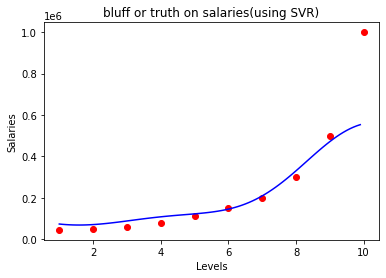

In [10]:
independent_grid = np.arange(min(scalar_inde.inverse_transform(independent)), max(scalar_inde.inverse_transform(independent)), 0.1)
dependent_pred_grid = scalar_depe.inverse_transform(regressor.predict(scalar_inde.transform(independent_grid.reshape(len(independent_grid), 1))))
plt.scatter(scalar_inde.inverse_transform(independent), scalar_depe.inverse_transform(dependent), color = "red")
plt.plot(independent_grid, dependent_pred_grid, color = "blue")
plt.title("bluff or truth on salaries(using SVR)")
plt.xlabel("Levels")
plt.ylabel("Salaries")
plt.show()